In [3]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt


df = pd.DataFrame(dict(segment=["A", "B", "C", "D"],
                       Alpha=[2400	, 1200,	600	, 250],
                       Beta=[1000	, 900,	600,	250],
                       Gamma=[400,	600	, 400,	250],
                       Delta=[200,	300	, 400,	250]))
df = df.set_index('segment')
melt_df = pd.melt(df.reset_index(), id_vars=[
                  "segment"], var_name='variable', value_name='value')

df_rowsum = df.apply(lambda x: x.sum(), axis=1)

for i in df_rowsum.index:
    for j in df.columns:
        df.loc[i, j] = df.loc[i, j]/df_rowsum[i]*100

df_rowsum = df_rowsum/np.sum(df_rowsum)*100
df['xmax'] = np.cumsum(df_rowsum)
df['xmin'] = df['xmax'] - df_rowsum

dfm = pd.melt(df.reset_index(), id_vars=[
              "segment", "xmin", "xmax"], value_name="percentage")

dfm['ymax'] = dfm.groupby('segment')['percentage'].transform(
    lambda x: np.cumsum(x))
dfm['ymin'] = dfm.apply(lambda x: x['ymax']-x['percentage'], axis=1)

dfm['xtext'] = dfm['xmin'] + (dfm['xmax'] - dfm['xmin'])/2
dfm['ytext'] = dfm['ymin'] + (dfm['ymax'] - dfm['ymin'])/2

# join()函数，连接两个表格data.frame
dfm = pd.merge(left=melt_df, right=dfm, how="left", on=["segment", "variable"])

df_label = pd.DataFrame(dict(x=np.repeat(102, 4), y=np.arange(
    12.5, 100, 25), label=["Alpha", "Beta", "Gamma", "Delta"]))

display(df, melt_df, df_rowsum, dfm)


,Alpha,Beta,Gamma,Delta,xmax,xmin
segment,,,,,,
A,60.0,25.0,10.0,5.0,40.0,0.0
B,40.0,30.0,20.0,10.0,70.0,40.0
C,30.0,30.0,20.0,20.0,90.0,70.0
D,25.0,25.0,25.0,25.0,100.0,90.0


,segment,variable,value
0,A,Alpha,2400
1,B,Alpha,1200
2,C,Alpha,600
3,D,Alpha,250
4,A,Beta,1000
5,B,Beta,900
6,C,Beta,600
7,D,Beta,250
8,A,Gamma,400
9,B,Gamma,600


segment
A    40.0
B    30.0
C    20.0
D    10.0
dtype: float64

,segment,variable,value,xmin,xmax,percentage,ymax,ymin,xtext,ytext
0,A,Alpha,2400,0.0,40.0,60.0,60.0,0.0,20.0,30.0
1,B,Alpha,1200,40.0,70.0,40.0,40.0,0.0,55.0,20.0
2,C,Alpha,600,70.0,90.0,30.0,30.0,0.0,80.0,15.0
3,D,Alpha,250,90.0,100.0,25.0,25.0,0.0,95.0,12.5
4,A,Beta,1000,0.0,40.0,25.0,85.0,60.0,20.0,72.5
5,B,Beta,900,40.0,70.0,30.0,70.0,40.0,55.0,55.0
6,C,Beta,600,70.0,90.0,30.0,60.0,30.0,80.0,45.0
7,D,Beta,250,90.0,100.0,25.0,50.0,25.0,95.0,37.5
8,A,Gamma,400,0.0,40.0,10.0,95.0,85.0,20.0,90.0
9,B,Gamma,600,40.0,70.0,20.0,90.0,70.0,55.0,80.0


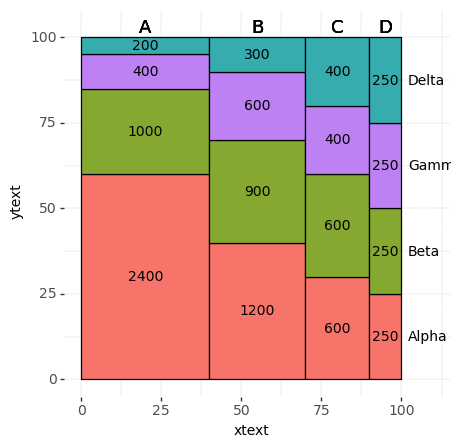

<ggplot: (142980953417)>


In [4]:
base_plot = (ggplot() +
             geom_rect(aes(ymin='ymin', ymax='ymax', xmin='xmin', xmax='xmax', fill='variable'),
                       dfm, colour="black") +
             geom_text(aes(x='xtext', y='ytext',  label='value'), dfm, size=10) +
             geom_text(aes(x='xtext', y=103, label='segment'), dfm, size=13) +
             geom_text(aes(x='x', y='y', label='label'), df_label, size=10, ha='left') +
             scale_x_continuous(breaks=np.arange(0, 101, 25), limits=(0, 110)) +
             scale_fill_hue(s=0.90, l=0.65, h=0.0417, color_space='husl') +
             theme(panel_background=element_blank(),
                   panel_grid_major=element_line(
                       colour="grey", size=.25, linetype="dotted"),
                   panel_grid_minor=element_line(
                       colour="grey", size=.25, linetype="dotted"),
                   text=element_text(size=10),
                   legend_position="none",
                   aspect_ratio=1.,
                   figure_size=(5, 5),
                   dpi=100
                   ))

print(base_plot)
